In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns


from pylab import * 


from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Analysis of Temperatures (By All Countries):

In [2]:
country_temp = pd.read_csv('Climate Change/GlobalLandTemperaturesByCountry.csv')

In [3]:
country_temp = country_temp[['dt','AverageTemperature','Country']]


In [4]:
country_temp

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland
5,1744-04-01,1.530,Åland
6,1744-05-01,6.702,Åland
7,1744-06-01,11.609,Åland
8,1744-07-01,15.342,Åland
9,1744-08-01,NaN,Åland


In [5]:
country_temp.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


In [6]:
country_temp.dropna(inplace=True)
country_temp.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
5,1744-04-01,1.530,Åland
6,1744-05-01,6.702,Åland
7,1744-06-01,11.609,Åland
8,1744-07-01,15.342,Åland


In [7]:
country_temp['dt']=pd.to_datetime(country_temp.dt).dt.strftime('%d/%m/%Y')

In [8]:
country_temp['dt']=country_temp['dt'].apply(lambda x:x[6:])
country_temp.head()

,dt,AverageTemperature,Country
0,1743,4.384,Åland
5,1744,1.530,Åland
6,1744,6.702,Åland
7,1744,11.609,Åland
8,1744,15.342,Åland


In [9]:
country_temp=country_temp.groupby(['dt','Country'])['AverageTemperature'].mean().reset_index()
country_temp.head()

,dt,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [10]:
ctemp_1950 = country_temp[country_temp['dt'] == "1950"]

ctemp_1960 = country_temp[country_temp['dt'] == "1960"]

ctemp_1970 = country_temp[country_temp['dt'] == "1970"]

ctemp_1980 = country_temp[country_temp['dt'] == "1980"]

ctemp_1990 = country_temp[country_temp['dt'] == "1990"]

ctemp_2000 = country_temp[country_temp['dt'] == "2000"]

ctemp_2013 = country_temp[country_temp['dt'] == "2013"]

In [11]:
data = [ dict(
        type = 'choropleth',
        locations = ctemp_1950['Country'],
        z = ctemp_1950['AverageTemperature'],
        locationmode = 'country names',
        zmin = -30,
        zmax = 50

        ) ]



data.append(data[0].copy())
data[-1]['z'] = ctemp_1960['AverageTemperature']
    
data.append(data[0].copy())
data[-1]['z'] = ctemp_1970['AverageTemperature']

data.append(data[0].copy())
data[-1]['z'] = ctemp_1980['AverageTemperature']

data.append(data[0].copy())
data[-1]['z'] = ctemp_1990['AverageTemperature']

data.append(data[0].copy())
data[-1]['z'] = ctemp_2000['AverageTemperature']

data.append(data[0].copy())
data[-1]['z'] = ctemp_2013['AverageTemperature']

In [12]:
steps = []
for i in range(len(data)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i*10 + 1950))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(
    active = 0,
#     currentvalue = {"prefix": "Years: "},
    pad = {"t": 1},
    steps = steps
)]

In [13]:
layout = dict(
    title = 'Global Average Temperatures from 1950 to 2013',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
#             type = 'Mercator'
            type = 'Kavrayskiy7')),
            sliders = sliders
        
    )



In [14]:
fig = dict( data=data, layout=layout )
# py.iplot( fig, validate=False, filename='d3-world-map' )
py.iplot( fig, validate=False, filename='d3-world-dmap' )

### Checking the Hottest and Coldest countries:

In [15]:
country_temp2 = country_temp[['Country','AverageTemperature']]
country_temp2=country_temp2.groupby(['Country'])['AverageTemperature'].mean().reset_index()
sorted_country = country_temp2.sort_values(by=['AverageTemperature']).reset_index().drop(['index'],axis=1)

hottest = sorted_country.tail(10)
coldest = sorted_country.head(10)

hot_cold = pd.concat([hottest,coldest],axis = 0).reset_index().drop(['index'],axis = 1)
hot_cold = hot_cold.sort_values(by=['AverageTemperature'])

hot_cold.head()

,Country,AverageTemperature
10,Greenland,-18.581912
11,Denmark,-18.047596
12,Svalbard And Jan Mayen,-7.442219
13,Russia,-5.577972
14,Canada,-5.334680


<BarContainer object of 20 artists>

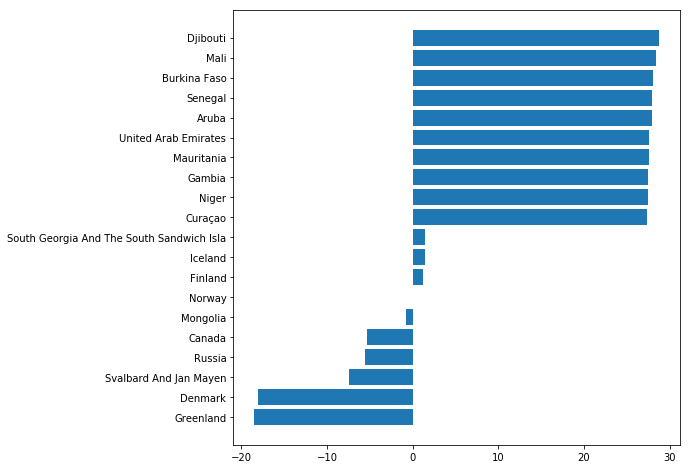

In [16]:
plt.figure(figsize=(8,8))
plt.barh(hot_cold['Country'],hot_cold['AverageTemperature'])

In [17]:
# sns.barplot(x='AverageTemperature',y='Country',data=hot_cold)

In [18]:
greenland = country_temp[country_temp['Country'] == "Greenland"]
djibouti = country_temp[country_temp['Country'] == "Djibouti"]


In [19]:
trace0=go.Scatter(
    x=greenland['dt'],
    y=greenland['AverageTemperature'],
    mode='lines',
    name = "Greenland"
  )

trace1=go.Scatter(
    x=djibouti['dt'],
    y=djibouti['AverageTemperature'],
    mode='lines',
      name = "Djibouti"
    )


data=[trace0,trace1]
figure=go.Figure(data=data)
py.iplot(figure, filename='line-mode')

# Analysis of United States:

In [20]:
US_temp=pd.read_csv('Climate Change/GlobalLandTemperaturesByState.csv')

In [21]:
US_temp = US_temp[US_temp['Country'] == "United States"]

In [22]:
US_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States
7463,1744-04-01,19.075,2.902,Alabama,United States
7464,1744-05-01,21.197,2.844,Alabama,United States
7465,1744-06-01,25.290,2.879,Alabama,United States
7466,1744-07-01,26.420,2.841,Alabama,United States
7467,1744-08-01,NaN,NaN,Alabama,United States


In [23]:
US_temp = US_temp[['dt','Country','State','AverageTemperature']]
US_temp.dropna(inplace=True)
US_temp['dt']=pd.to_datetime(US_temp.dt).dt.strftime('%d/%m/%Y')
US_temp['dt']=US_temp['dt'].apply(lambda x:x[6:])

US_temp.head()

,dt,Country,State,AverageTemperature
7458,1743,United States,Alabama,10.722
7463,1744,United States,Alabama,19.075
7464,1744,United States,Alabama,21.197
7465,1744,United States,Alabama,25.290
7466,1744,United States,Alabama,26.420


In [24]:
US_temp=US_temp.groupby(['dt','State'])['AverageTemperature'].mean().reset_index()
US_temp['dt'] = US_temp['dt'].astype(int)
US_temp.head()


,dt,State,AverageTemperature
0,1743,Alabama,10.722
1,1743,Connecticut,3.818
2,1743,Delaware,6.127
3,1743,District Of Columbia,5.339
4,1743,Florida,17.694


In [25]:
US_temp2 = US_temp[['dt','AverageTemperature']]
US_temp2.head()

,dt,AverageTemperature
0,1743,10.722
1,1743,3.818
2,1743,6.127
3,1743,5.339
4,1743,17.694


In [26]:
US_temp2=US_temp2.groupby(['dt'])['AverageTemperature'].mean().reset_index()
US_temp2.head()

,dt,AverageTemperature
0,1743,4.544966
1,1744,12.837651
2,1745,2.649112
3,1750,11.339737
4,1751,12.039267


In [27]:
trace=go.Scatter(
    x=US_temp2['dt'],
    y=US_temp2['AverageTemperature'],
    mode='lines',
  
    )
data=[trace]

layout = go.Layout(title = "Average US Temperature",
                    xaxis=dict(
                        title='Years',
#                         titlefont=dict(
#                             family='Courier New, monospace',
#                             size=18,
#                             color='#7f7f7f'
                        )
                    ,yaxis=dict(
                    title='Temperature in Degree Celcius',
#                         titlefont=dict(
#                             family='Courier New, monospace',
#                             size=18,
#                             color='#7f7f7f'
        )
    )



figure=go.Figure(data=data,layout=layout)
py.iplot(figure, filename='line-mode')

# Analysis of Increase in Global Temperatures :

In [28]:
global_temp=pd.read_csv('Climate Change/GlobalTemperatures.csv')
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
global_temp=pd.read_csv('Climate Change/GlobalTemperatures.csv')
global_temp=global_temp[['dt','LandAverageTemperature']]
global_temp.dropna(inplace=True)

global_temp.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [30]:
global_temp['dt']=pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp.head()

,dt,LandAverageTemperature
0,01/01/1750,3.034
1,01/02/1750,3.083
2,01/03/1750,5.626
3,01/04/1750,8.490
4,01/05/1750,11.573


In [31]:
global_temp['dt']=global_temp['dt'].apply(lambda x:x[6:])
global_temp.head()

,dt,LandAverageTemperature
0,1750,3.034
1,1750,3.083
2,1750,5.626
3,1750,8.490
4,1750,11.573


In [32]:
global_temp=global_temp.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

global_temp.head()

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333


## Plotting global temperatures over the years :

In [33]:
trace=go.Scatter(
    x=global_temp['dt'],
    y=global_temp['LandAverageTemperature'],
    mode='lines',
    )
data=[trace]

py.iplot(data, filename='line-mode')

In [34]:
# trace=go.Scatter(
#     x=global_temp['dt'],
#     y=global_temp['LandAverageTemperature'],
#     mode='markers',
#     )
# data=[trace]

# py.iplot(data)

## Average Temperatures By Seasons :

In [35]:
global_temp = pd.read_csv('Climate Change/GlobalTemperatures.csv')

In [36]:
global_temp = global_temp[['dt', 'LandAverageTemperature']]


In [37]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)


In [38]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [39]:
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)


In [40]:
global_temp['season'] = global_temp['month'].apply(get_season)


In [41]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []
years_list = []

for year in years:
    years_list.append(year)
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

In [42]:
trace0=go.Scatter(
    x=years_list,
    y=summer_temps,
    mode='lines',
    name = "Summer"
    )

trace1=go.Scatter(
    x=years_list,
    y=autumn_temps,
    mode='lines',
    name = "Autumn"
    )

trace2=go.Scatter(
    x=years_list,
    y=spring_temps,
    mode='lines',
    name = "Spring"
    )

trace3=go.Scatter(
    x=years_list,
    y=winter_temps,
    mode='lines',
    name = "Winter"
    )


data=[trace0,trace1,trace2, trace3]


layout = go.Layout(
    title='Average Global Temperatures by Seasons',
    xaxis=dict(
        title='Years',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Temperature in Degree Celcius',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
figure=go.Figure(data=data,layout=layout)
py.iplot(figure, filename='line-mode')

## Applying Regression (Scatterplot with Regression Line) :

In [43]:
global_temp=pd.read_csv('Climate Change/GlobalTemperatures.csv')
global_temp=global_temp[['dt','LandAverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt']=pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt']=global_temp['dt'].apply(lambda x:x[6:])
global_temp=global_temp.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()


global_temp.head()

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333


In [44]:
global_temp['dt'] = global_temp['dt'].astype(int)

In [45]:
X = global_temp.iloc[:, 0].values
y = global_temp.iloc[:, 1].values

In [46]:
# plt.scatter(X,y)

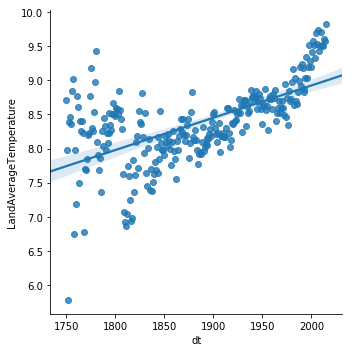

In [47]:
import seaborn as sns
sns.lmplot(x='dt',y='LandAverageTemperature',data=global_temp,fit_reg=True,order=1) 

# Linear Regression using Scikit Learn :

In [48]:
global_temp=pd.read_csv('Climate Change/GlobalTemperatures.csv')
global_temp=global_temp[['dt','LandAverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt']=pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt']=global_temp['dt'].apply(lambda x:x[6:])
global_temp=global_temp.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

global_temp['dt'] = global_temp['dt'].astype(int)
global_temp.head()

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333


In [49]:
X = global_temp.iloc[:, :-1].values
y = global_temp.iloc[:, 1].values

In [50]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_pred = regressor.predict(X_test)


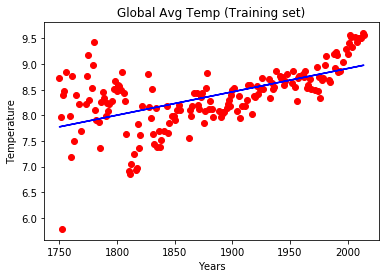

In [53]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Global Avg Temp (Training set)')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

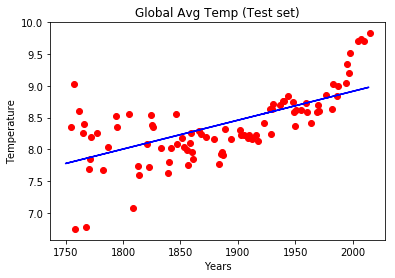

In [54]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Global Avg Temp (Test set)')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

In [55]:
import sklearn
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

0.41064012103718067


## Plotting Co2 Emission Correlation:

In [56]:
co2 = pd.read_csv('co2_emission/global.1751_2010.csv')
co2

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,Source: Tom Boden (Oak Ridge National Laboratory),Gregg Marland (Appalachian State University),and Bob Andres (Oak Ridge National Laboratory),NaN,NaN,NaN,NaN,NaN
1,1751,3,0,0.0,3.0,0.0,0.0,NaN
2,1752,3,0,0.0,3.0,0.0,0.0,NaN
3,1753,3,0,0.0,3.0,0.0,0.0,NaN
4,1754,3,0,0.0,3.0,0.0,0.0,NaN
5,1755,3,0,0.0,3.0,0.0,0.0,NaN
6,1756,3,0,0.0,3.0,0.0,0.0,NaN
7,1757,3,0,0.0,3.0,0.0,0.0,NaN
8,1758,3,0,0.0,3.0,0.0,0.0,NaN
9,1759,3,0,0.0,3.0,0.0,0.0,NaN


In [57]:
co2 = pd.read_csv('co2_emission/global.1751_2010.csv')
co2 = co2.iloc[1:,:]
co2 = co2.reset_index()
co2 = co2.rename(columns={'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)': 'Total Emission'})
co2 = co2[['Year', 'Total Emission']]
co2.head()

,Year,Total Emission
0,1751,3
1,1752,3
2,1753,3
3,1754,3
4,1755,3


In [58]:
global1=pd.read_csv('Climate Change/GlobalTemperatures.csv')
global1=global1[['dt','LandAverageTemperature']]

global1.dropna(inplace=True)

global1['dt']=pd.to_datetime(global1.dt).dt.strftime('%d/%m/%Y')

global1['dt']=global1['dt'].apply(lambda x:x[6:])

global1=global1.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

global1['dt'] = global1['dt'].astype(int)

global1.head()

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333


## Plotting Co2 Emission over the years :

In [59]:
trace=go.Scatter(
    x=co2['Year'],
    y=co2['Total Emission'],
    mode='lines',
    )
data=[trace]

py.iplot(data, filename='line-mode')

## Plotting Correlation between Global Average Temperature and Co2 Emissions:

In [60]:
global2 = global1[global1["dt"] >= 1751] 
global2 = global2[global2['dt'] <= 2010] 
global2 = global2.reset_index()

In [61]:
co2['Total Emission'] = co2['Total Emission'].astype(int)
co2['avgtemp'] = global2['LandAverageTemperature']


In [62]:
np.corrcoef(co2['Total Emission'], global2['LandAverageTemperature'])

array([[1.        , 0.67184748],
       [0.67184748, 1.        ]])

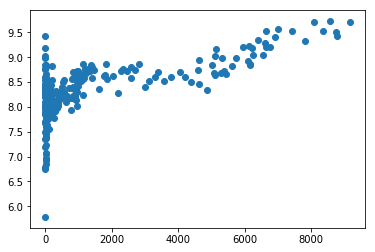

In [63]:
plt.scatter(co2['Total Emission'], global2['LandAverageTemperature'])
plt.show()

# Thank You

# Temperature Trend Prediction using RNN :

## setting the Training Data :

In [64]:
global_temp = pd.read_csv('Climate Change/GlobalTemperatures.csv')
global_temp=global_temp[['dt','LandAverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt']=pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt']=global_temp['dt'].apply(lambda x:x[6:])
global_temp['dt'] = global_temp['dt'].astype(int)
global_temp = global_temp.reset_index()
global_temp = global_temp[['dt','LandAverageTemperature']]
global_temp.head()

,dt,LandAverageTemperature
0,1750,3.034
1,1750,3.083
2,1750,5.626
3,1750,8.490
4,1750,11.573


In [65]:
# global_temp.iloc[1800:,:]

In [67]:
#  global_temp.iloc[1800:3156,:]

In [68]:
# dataset_train = global_temp.iloc[:2388,:]
# dataset_train

dataset_train_2 = global_temp.iloc[1800:3156,:].reset_index().drop(['index'],axis =1)
dataset_train_2.head()

,dt,LandAverageTemperature
0,1901,2.191
1,1901,3.092
2,1901,5.671
3,1901,8.522
4,1901,11.178


In [69]:
# training_set = dataset_train.iloc[:,1:2].values
# training_set

training_set_2 = dataset_train_2.iloc[:,1:2].values
training_set_2

array([[ 2.191],
       [ 3.092],
       [ 5.671],
       ...,
       [10.256],
       [ 7.424],
       [ 4.724]])

In [70]:
# testdata = global_temp.iloc[2388:,:]
# dataset_test=testdata.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

# dataset_test

dataset_test_2 = global_temp.iloc[3156:,:].reset_index().drop(['index'],axis=1)
dataset_test_2.head()


,dt,LandAverageTemperature
0,2014,3.732
1,2014,3.500
2,2014,6.378
3,2014,9.589
4,2014,12.582


In [71]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set_2)

In [72]:
# Creating a data structure with 120 timestamps and 1 output

X_train = []
y_train = []
for i in range(120, 1354):
    X_train.append(training_set_scaled[i - 120 : i , 0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)

In [73]:
# Reshaping

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [74]:
# Importing keras libs and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [75]:
# Initializing the RNN

regressor = Sequential()

# Adding the 1st LSTM Layer and some Dropout

regressor.add(LSTM(units=80, return_sequences=True, input_shape = (X_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

# Adding the 2nd LSTM Layer and Dropout

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the 3rf LSTM Layer and Dropout

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

#EXTRA LSTM LAYERS:
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding 4th LSTM Layer and Dropout

regressor.add(LSTM(units=80, return_sequences=False))
regressor.add(Dropout(0.2))

# Adding the Output Layer

regressor.add(Dense(units=1))

# Compiling the RNN

regressor.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
# Fitting the RNN to the Training Set
regressor.fit( X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1234/1234 [==============================] - 18s 15ms/step - loss: 0.1350
Epoch 2/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0902
Epoch 3/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0919
Epoch 4/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0920
Epoch 5/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0938
Epoch 6/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0909
Epoch 7/100
1234/1234 [==============================] - 13s 11ms/step - loss: 0.0942
Epoch 8/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0914
Epoch 9/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0823
Epoch 10/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0105
Epoch 11/100
1234/1234 [==============================] - 13s 10ms/step - loss: 0.0054
Epoch 12/100
1234/1234 [============================

In [76]:
# Getting the real stock price of 2017

real_temps = dataset_test_2.iloc[: , 1:2].values

In [77]:
dataset_total = pd.concat((dataset_train_2["LandAverageTemperature"], dataset_test_2["LandAverageTemperature"]) , axis = 0)

In [78]:
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values  # from 126 upto 266

inputs = dataset_total[len(dataset_total) - len(dataset_test_2) - 120 : ].values  # from 126 upto 266


inputs

array([ 3.525,  4.499,  6.321,  9.249, 11.571, 13.889, 14.312, 14.188,
       12.642, 10.127,  7.315,  4.257,  3.808,  3.92 ,  6.544,  9.618,
       12.226, 14.476, 15.19 , 14.51 , 13.217, 10.601,  7.423,  4.878,
        3.286,  4.43 ,  6.329,  9.055, 11.786, 14.443, 15.042, 14.913,
       12.875, 10.289,  6.955,  4.987,  4.579,  4.221,  6.485,  9.823,
       12.518, 14.309, 15.23 , 14.752, 12.93 , 10.332,  7.084,  4.523,
        2.844,  3.576,  6.906,  9.295, 12.054, 14.145, 15.174, 14.377,
       12.802, 10.399,  7.224,  4.385,  3.687,  4.094,  6.086,  9.367,
       12.112, 14.201, 15.231, 14.655, 13.153, 10.136,  7.031,  4.31 ,
        3.737,  4.399,  6.738,  9.671, 12.406, 14.421, 15.213, 14.768,
       12.863, 10.442,  7.487,  4.292,  3.282,  3.743,  6.101,  9.483,
       11.986, 14.37 , 15.482, 15.012, 12.912, 10.352,  6.814,  4.655,
        3.157,  3.628,  6.023,  9.676, 12.59 , 14.492, 15.076, 14.72 ,
       13.04 , 10.428,  7.156,  4.102,  3.685,  4.222,  6.261,  9.044,
      

In [79]:
inputs = inputs.reshape(-1 , 1)
inputs


array([[ 3.525],
       [ 4.499],
       [ 6.321],
       [ 9.249],
       [11.571],
       [13.889],
       [14.312],
       [14.188],
       [12.642],
       [10.127],
       [ 7.315],
       [ 4.257],
       [ 3.808],
       [ 3.92 ],
       [ 6.544],
       [ 9.618],
       [12.226],
       [14.476],
       [15.19 ],
       [14.51 ],
       [13.217],
       [10.601],
       [ 7.423],
       [ 4.878],
       [ 3.286],
       [ 4.43 ],
       [ 6.329],
       [ 9.055],
       [11.786],
       [14.443],
       [15.042],
       [14.913],
       [12.875],
       [10.289],
       [ 6.955],
       [ 4.987],
       [ 4.579],
       [ 4.221],
       [ 6.485],
       [ 9.823],
       [12.518],
       [14.309],
       [15.23 ],
       [14.752],
       [12.93 ],
       [10.332],
       [ 7.084],
       [ 4.523],
       [ 2.844],
       [ 3.576],
       [ 6.906],
       [ 9.295],
       [12.054],
       [14.145],
       [15.174],
       [14.377],
       [12.802],
       [10.399],
       [ 7.224

In [80]:
inputs = sc.transform(inputs)
# len(inputs)
inputs

array([[0.15120324],
       [0.220345  ],
       [0.34968411],
       [0.55753532],
       [0.72236814],
       [0.88691702],
       [0.9169447 ],
       [0.90814226],
       [0.79839568],
       [0.61986228],
       [0.42024562],
       [0.20316604],
       [0.17129268],
       [0.17924327],
       [0.3655143 ],
       [0.58372968],
       [0.76886491],
       [0.92858664],
       [0.97927167],
       [0.93100021],
       [0.83921346],
       [0.65351033],
       [0.42791226],
       [0.24724924],
       [0.13423724],
       [0.21544687],
       [0.35025201],
       [0.54376375],
       [0.73763044],
       [0.92624405],
       [0.96876553],
       [0.95960815],
       [0.81493576],
       [0.63136225],
       [0.39469014],
       [0.25498687],
       [0.22602399],
       [0.20061049],
       [0.36132605],
       [0.5982821 ],
       [0.78959324],
       [0.91673174],
       [0.98211117],
       [0.94817917],
       [0.81884007],
       [0.63441471],
       [0.40384752],
       [0.222

In [81]:
len(inputs)

144

In [82]:
X_test = []
for i in range(120, 144):
    X_test.append(inputs[i - 120 : i , 0])

X_test

[array([0.15120324, 0.220345  , 0.34968411, 0.55753532, 0.72236814,
        0.88691702, 0.9169447 , 0.90814226, 0.79839568, 0.61986228,
        0.42024562, 0.20316604, 0.17129268, 0.17924327, 0.3655143 ,
        0.58372968, 0.76886491, 0.92858664, 0.97927167, 0.93100021,
        0.83921346, 0.65351033, 0.42791226, 0.24724924, 0.13423724,
        0.21544687, 0.35025201, 0.54376375, 0.73763044, 0.92624405,
        0.96876553, 0.95960815, 0.81493576, 0.63136225, 0.39469014,
        0.25498687, 0.22602399, 0.20061049, 0.36132605, 0.5982821 ,
        0.78959324, 0.91673174, 0.98211117, 0.94817917, 0.81884007,
        0.63441471, 0.40384752, 0.2220487 , 0.10286079, 0.1548236 ,
        0.39121176, 0.56080074, 0.75665507, 0.9050898 , 0.97813587,
        0.92155888, 0.80975367, 0.63917087, 0.41378576, 0.21225243,
        0.1627032 , 0.19159509, 0.33300206, 0.56591183, 0.76077234,
        0.9090651 , 0.98218215, 0.94129339, 0.83467026, 0.62050117,
        0.40008518, 0.20692837, 0.16625257, 0.21

In [83]:
X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] , 1))

In [45]:
predicted_temps = regressor.predict(X_test)
predicted_temps = sc.inverse_transform(predicted_temps)

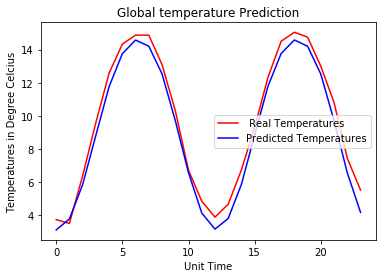

In [46]:
# Visualizing the Results :

# plt.figure(figsize=(50,7))


# plt.subplot(211)
plt.plot(real_temps, color = 'red' , label = ' Real Temperatures')

# plt.subplot(212)
plt.plot(predicted_temps, color = 'blue' , label = 'Predicted Temperatures')
plt.title('Global temperature Prediction')
plt.xlabel('Unit Time')
plt.ylabel('Temperatures in Degree Celcius') 
plt.legend()
plt.show()